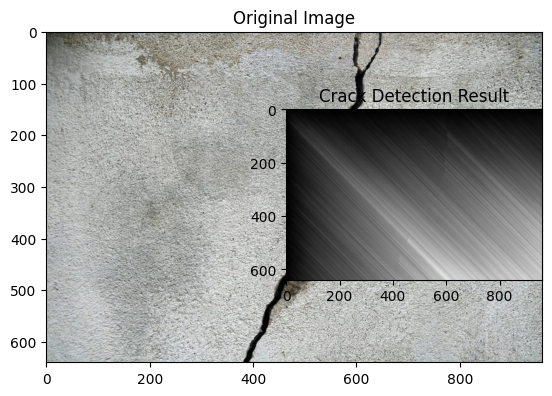

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('cracking.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply a Gaussian filter to remove noise
gray = cv2.GaussianBlur(gray, (5, 5), 0)

# Compute the gradient of the image
grad_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
grad_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)

# Compute the surface normal using the SFS method
normal = np.zeros((gray.shape[0], gray.shape[1], 3))
for i in range(gray.shape[0]):
    for j in range(gray.shape[1]):
        p = grad_x[i, j]
        q = grad_y[i, j]
        normal[i, j, 0] = p / np.sqrt(p**2 + q**2 + 1)
        normal[i, j, 1] = q / np.sqrt(p**2 + q**2 + 1)
        normal[i, j, 2] = 1 / np.sqrt(p**2 + q**2 + 1)

# Integrate the surface normal to obtain the 3D shape
shape = np.zeros((gray.shape[0], gray.shape[1], 3))
for i in range(1, gray.shape[0]):
    for j in range(1, gray.shape[1]):
        shape[i, j, 0] = shape[i-1, j, 0] + normal[i, j, 0]
        shape[i, j, 1] = shape[i, j-1, 1] + normal[i, j, 1]
        shape[i, j, 2] = shape[i-1, j-1, 2] + normal[i, j, 2]

# Create a figure and axis
fig, ax = plt.subplots()

# Display the original image
ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax.set_title('Original Image')

# Create a new axis for the crack detection result
ax2 = fig.add_axes([0.5, 0.1, 0.4, 0.8])

# Display the 3D shape
ax2.imshow(shape[:, :, 2], cmap='gray')
ax2.set_title('Crack Detection Result')

# Show the plot
plt.show()

In [8]:
import cv2
import numpy as np

# Step 1: Load image and convert to grayscale
image = cv2.imread('cracking.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Step 2: Apply Gaussian blur to reduce noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Step 3: Estimate gradient (intensity changes)
grad_x = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=5)  # Gradient in x direction
grad_y = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=5)  # Gradient in y direction

# Step 4: Compute magnitude and direction of gradients
magnitude = np.sqrt(grad_x**2 + grad_y**2)
direction = np.arctan2(grad_y, grad_x)

# Step 5: Threshold the magnitude to highlight crack regions
_, crack_mask = cv2.threshold(magnitude, 50, 255, cv2.THRESH_BINARY)

# Step 6: Post-process the crack mask (e.g., morphological operations)
kernel = np.ones((3, 3), np.uint8)
crack_mask = cv2.morphologyEx(crack_mask, cv2.MORPH_CLOSE, kernel)

# Step 7: Display the results
cv2.imshow('Crack Detection', crack_mask)
cv2.waitKey(0)
cv2.destroyAllWindows()


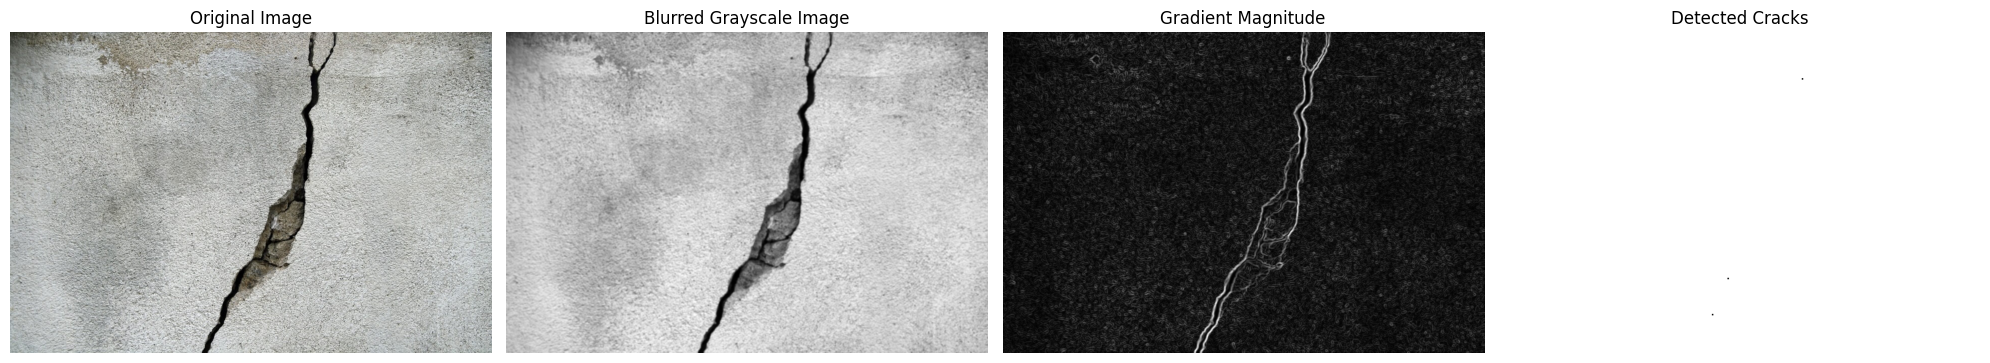

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the image and convert it to grayscale
image = cv2.imread('cracking.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Step 2: Apply Gaussian blur to smooth the image and reduce noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Step 3: Compute gradients using Sobel operator to estimate the surface normal (x and y directions)
grad_x = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=5)  # Gradient in x-direction
grad_y = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=5)  # Gradient in y-direction

# Step 4: Compute the magnitude and direction of the gradient (representing surface normal)
magnitude = np.sqrt(grad_x**2 + grad_y**2)  # Gradient magnitude
direction = np.arctan2(grad_y, grad_x)      # Gradient direction (in radians)

# Step 5: Threshold the gradient magnitude to detect potential crack areas
_, crack_mask = cv2.threshold(magnitude, 50, 255, cv2.THRESH_BINARY)

# Step 6: Post-process the crack mask using morphological operations to clean up
kernel = np.ones((3, 3), np.uint8)
crack_mask = cv2.morphologyEx(crack_mask.astype(np.uint8), cv2.MORPH_CLOSE, kernel)

# Step 7: Visualize the results using Matplotlib

# Plot the original image, the gradient magnitude, and the detected crack mask
fig, ax = plt.subplots(1, 4, figsize=(20, 10))

ax[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(blurred, cmap='gray')
ax[1].set_title('Blurred Grayscale Image')
ax[1].axis('off')

ax[2].imshow(magnitude, cmap='gray')
ax[2].set_title('Gradient Magnitude')
ax[2].axis('off')

ax[3].imshow(crack_mask, cmap='gray')
ax[3].set_title('Detected Cracks')
ax[3].axis('off')

plt.tight_layout()
plt.show()


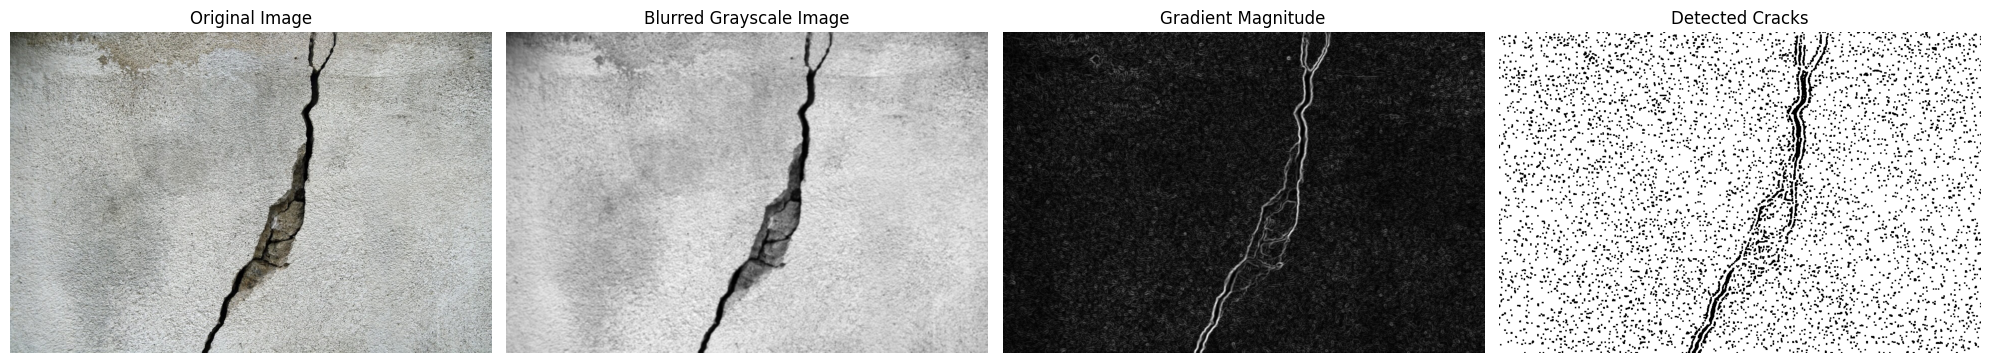

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the image and convert it to grayscale
image = cv2.imread('cracking.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Step 2: Apply Gaussian blur to reduce noise and smooth the image
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Step 3: Compute gradients using Sobel operator
grad_x = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=5)  # Gradient in x direction
grad_y = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=5)  # Gradient in y direction

# Step 4: Compute the magnitude of gradients
magnitude = np.sqrt(grad_x**2 + grad_y**2)

# Normalize the magnitude to range [0, 255]
magnitude = np.uint8(255 * magnitude / np.max(magnitude))

# Step 5: Apply adaptive thresholding to detect cracks dynamically
crack_mask = cv2.adaptiveThreshold(magnitude, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                   cv2.THRESH_BINARY, 11, 2)

# Step 6: Apply morphological operations to refine crack detection
kernel = np.ones((3, 3), np.uint8)
crack_mask = cv2.morphologyEx(crack_mask, cv2.MORPH_CLOSE, kernel)

# Step 7: Visualize the results using Matplotlib
fig, ax = plt.subplots(1, 4, figsize=(20, 10))

ax[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(blurred, cmap='gray')
ax[1].set_title('Blurred Grayscale Image')
ax[1].axis('off')

ax[2].imshow(magnitude, cmap='gray')
ax[2].set_title('Gradient Magnitude')
ax[2].axis('off')

ax[3].imshow(crack_mask, cmap='gray')
ax[3].set_title('Detected Cracks')
ax[3].axis('off')

plt.tight_layout()
plt.show()


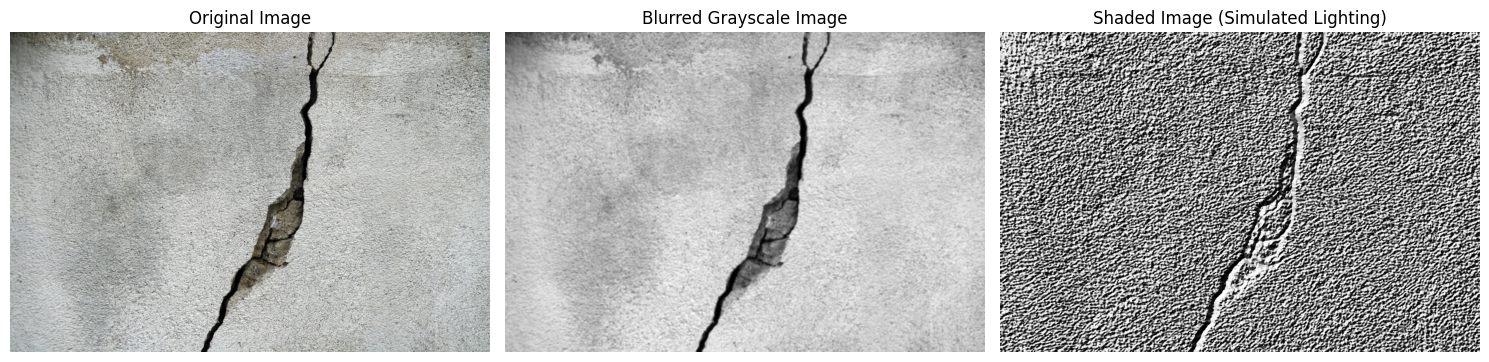

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the image and convert it to grayscale
image = cv2.imread('cracking.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Step 2: Apply Gaussian blur to reduce noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Step 3: Compute gradients using Sobel operator
grad_x = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=5)  # Gradient in x direction
grad_y = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=5)  # Gradient in y direction

# Step 4: Compute the magnitude and direction of gradients (for surface normals)
magnitude = np.sqrt(grad_x**2 + grad_y**2)
direction = np.arctan2(grad_y, grad_x)  # Angle in radians

# Normalize the gradients to simulate surface normals
norm_grad_x = grad_x / (magnitude + 1e-10)
norm_grad_y = grad_y / (magnitude + 1e-10)

# Step 5: Define a light source direction (arbitrary)
light_dir = np.array([1, 1, 1])  # Direction of light coming from top-right

# Step 6: Compute shading based on the light direction and surface normals
# For simplicity, assume that the surface normals are [grad_x, grad_y, 1]
normal_map = np.dstack((norm_grad_x, norm_grad_y, np.ones_like(grad_x)))
light_intensity = np.dot(normal_map, light_dir)  # Dot product to calculate shading

# Normalize the shading to the range [0, 255] for display
shading = np.clip(255 * (light_intensity - np.min(light_intensity)) / np.ptp(light_intensity), 0, 255).astype(np.uint8)

# Step 7: Visualize the results using Matplotlib
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(blurred, cmap='gray')
ax[1].set_title('Blurred Grayscale Image')
ax[1].axis('off')

ax[2].imshow(shading, cmap='gray')
ax[2].set_title('Shaded Image (Simulated Lighting)')
ax[2].axis('off')

plt.tight_layout()
plt.show()


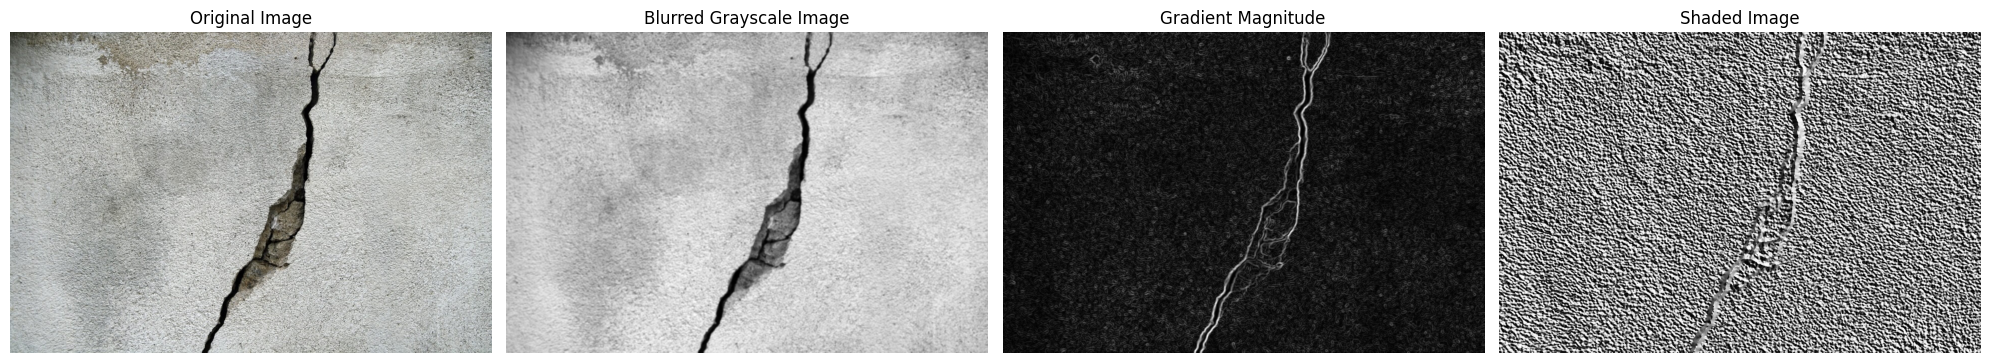

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the image and convert it to grayscale
image = cv2.imread('cracking.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Step 2: Apply Gaussian blur to reduce noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Step 3: Compute gradients using Sobel operator
grad_x = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=5)  # Gradient in x direction
grad_y = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=5)  # Gradient in y direction

# Step 4: Compute the magnitude of gradients
magnitude = np.sqrt(grad_x**2 + grad_y**2)

# Normalize the magnitude to range [0, 255] for visualization
magnitude = np.uint8(255 * magnitude / np.max(magnitude))

# Step 5: Shade the image based on gradients
# Assume a light source direction (light_x, light_y)
light_x, light_y = 1, -1  # Light source coming from top-right

# Normalize gradients to unit vectors
grad_magnitude = np.sqrt(grad_x**2 + grad_y**2)
norm_grad_x = grad_x / (grad_magnitude + 1e-10)
norm_grad_y = grad_y / (grad_magnitude + 1e-10)

# Compute shading intensity based on dot product of gradient and light source direction
shading = norm_grad_x * light_x + norm_grad_y * light_y

# Normalize shading to range [0, 255] for display
shading = (shading - np.min(shading)) / (np.max(shading) - np.min(shading))
shading = np.uint8(shading * 255)

# Step 6: Apply a threshold on the shading result to highlight cracks
_, crack_mask = cv2.threshold(shading, 50, 255, cv2.THRESH_BINARY)

# Step 7: Visualize the results using Matplotlib
fig, ax = plt.subplots(1, 4, figsize=(20, 10))

ax[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(blurred, cmap='gray')
ax[1].set_title('Blurred Grayscale Image')
ax[1].axis('off')

ax[2].imshow(magnitude, cmap='gray')
ax[2].set_title('Gradient Magnitude')
ax[2].axis('off')

ax[3].imshow(shading, cmap='gray')
ax[3].set_title('Shaded Image')
ax[3].axis('off')

plt.tight_layout()
plt.show()


In [5]:

import traceback
import numpy as np
import scipy as sp
import scipy.ndimage as spim
import matplotlib.pyplot as plt 
# import skfmm


    
im = spim.imread('cracking.jpg', True)
#     im = im[im.shape[0] / 2:, im.shape[1] / 2:]
    
N = np.gradient(im)
N = np.concatenate((N[1][..., None], N[0][..., None], np.ones_like(N[0][..., None])), axis=2)
N = N / np.sqrt((N ** 2).sum(2))[..., None]
    
L = N.dot([0, 0, 1])
epsilon = 1e-9
     
W = np.sqrt(1 / L ** 2 - 1)
W[W < epsilon] = epsilon
W[~np.isfinite(W)] = epsilon
     
p = np.empty_like(W)
p[...] = -1
#     p[704, 1485] = 1
#     p[193, 159] = 1
p[L > (1 - epsilon)] = 1
     
#t = skfmm.travel_time(p, 1 / W)

plt.figure()     
plt.imshow(im, cmap='gray') 
plt.figure()
plt.imshow(N, cmap='gray')
plt.figure()
plt.imshow(L, cmap='gray')
plt.figure()
plt.imshow(W, cmap='gray')
plt.figure()
plt.imshow(p, cmap='gray')
plt.figure()
# plt.imshow(-t, cmap='gray')
    
    
plt.show()


AttributeError: module 'scipy.ndimage' has no attribute 'imread'

C:\Users\harih\AppData\Local\Temp\ipykernel_19500\1112002139.py:9: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread('cracking.jpg', mode='F')  # 'F' loads as float grayscale
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


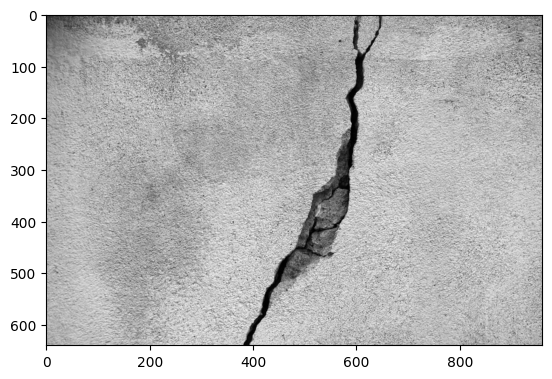

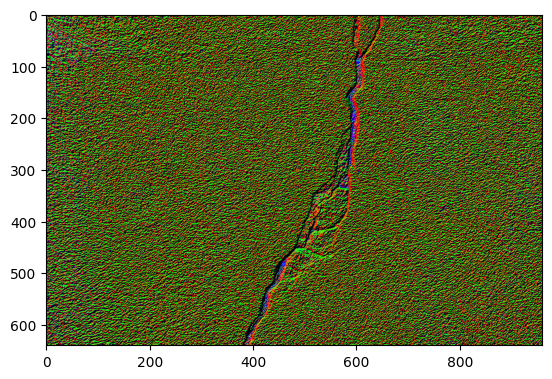

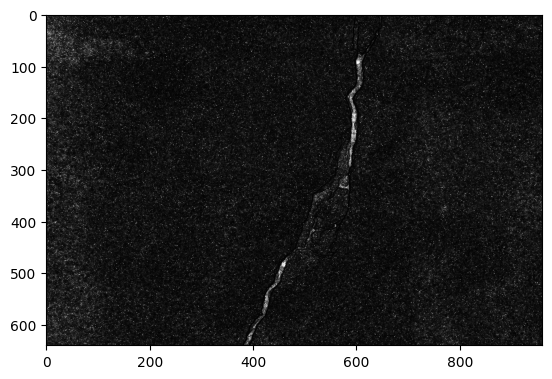

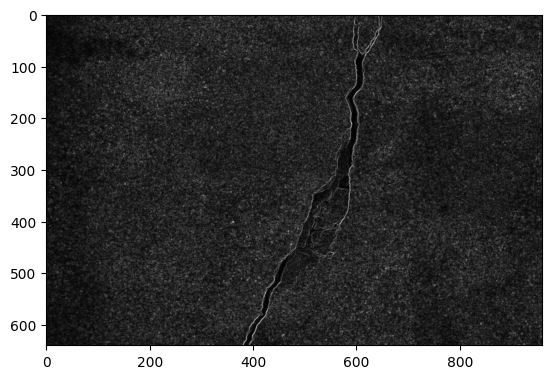

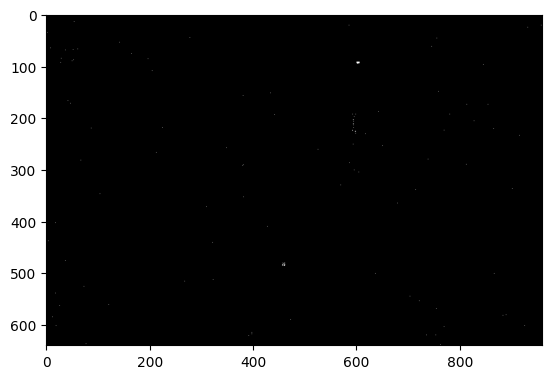

In [7]:
import traceback
import numpy as np
import scipy as sp
import scipy.ndimage as spim
import matplotlib.pyplot as plt
import imageio  # new import to replace imread

# Load image using imageio with mode 'F' for grayscale
im = imageio.imread('cracking.jpg', mode='F')  # 'F' loads as float grayscale

# Proceed with the rest of your code
N = np.gradient(im)
N = np.concatenate((N[1][..., None], N[0][..., None], np.ones_like(N[0][..., None])), axis=2)
N = N / np.sqrt((N ** 2).sum(2))[..., None]

L = N.dot([0, 0, 1])
epsilon = 1e-9

W = np.sqrt(1 / L ** 2 - 1)
W[W < epsilon] = epsilon
W[~np.isfinite(W)] = epsilon

p = np.empty_like(W)
p[...] = -1
p[L > (1 - epsilon)] = 1

# Visualization
plt.figure()
plt.imshow(im, cmap='gray')
plt.figure()
plt.imshow(N, cmap='gray')
plt.figure()
plt.imshow(L, cmap='gray')
plt.figure()
plt.imshow(W, cmap='gray')
plt.figure()
plt.imshow(p, cmap='gray')

plt.show()


C:\Users\harih\AppData\Local\Temp\ipykernel_19500\582623854.py:9: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread('crack3.jpg', mode='F')  # 'F' loads as float grayscale
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


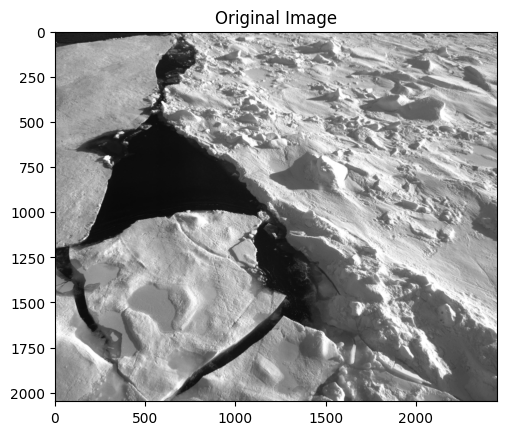

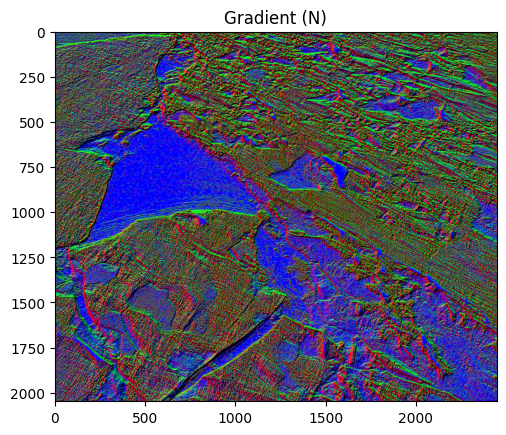

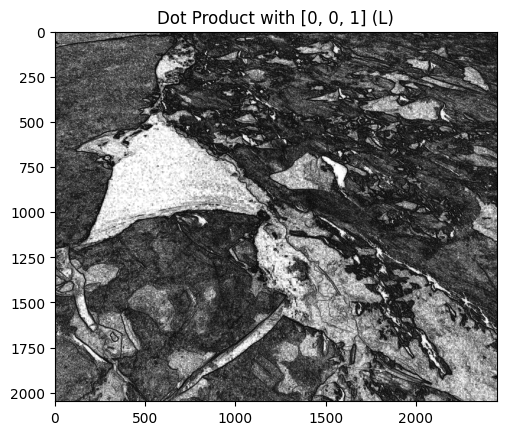

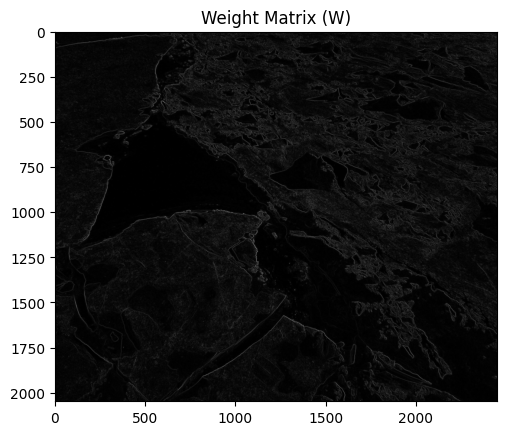

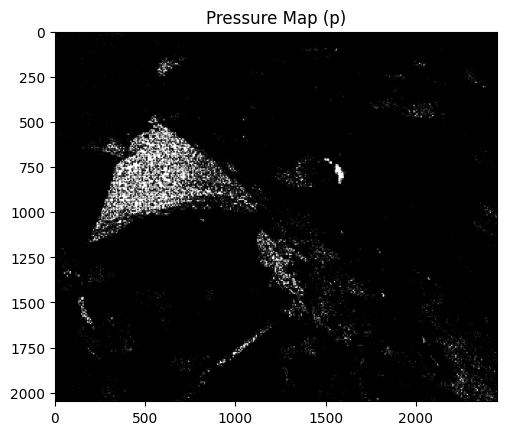

In [11]:
import traceback
import numpy as np
import scipy as sp
import scipy.ndimage as spim
import matplotlib.pyplot as plt
import imageio  # new import to replace imread

# Load image using imageio with mode 'F' for grayscale
im = imageio.imread('crack3.jpg', mode='F')  # 'F' loads as float grayscale

# Proceed with the rest of your code
N = np.gradient(im)
N = np.concatenate((N[1][..., None], N[0][..., None], np.ones_like(N[0][..., None])), axis=2)
N = N / np.sqrt((N ** 2).sum(2))[..., None]

L = N.dot([0, 0, 1])
epsilon = 1e-9

W = np.sqrt(1 / L ** 2 - 1)
W[W < epsilon] = epsilon
W[~np.isfinite(W)] = epsilon

p = np.empty_like(W)
p[...] = -1
p[L > (1 - epsilon)] = 1

# Visualization
plt.figure()
plt.imshow(im, cmap='gray')
plt.title("Original Image")  # Title for original image

plt.figure()
plt.imshow(N, cmap='gray')
plt.title("Gradient (N)")  # Title for gradient plot

plt.figure()
plt.imshow(L, cmap='gray')
plt.title("Dot Product with [0, 0, 1] (L)")  # Title for L plot

plt.figure()
plt.imshow(W, cmap='gray')
plt.title("Weight Matrix (W)")  # Title for weight matrix

plt.figure()
plt.imshow(p, cmap='gray')
plt.title("Pressure Map (p)")  # Title for pressure map

plt.show()


In [2]:
import cv2
import numpy as np

# Load the grayscale image
image = cv2.imread('cracking.jpg')
if image is None:
    raise ValueError("Image not found. Please check the path.")

# Load the depth map
depth_map = cv2.imread('depthmap.png', cv2.IMREAD_GRAYSCALE)
if depth_map is None:
    raise ValueError("Depth map not found. Please check the path.")

# Normalize depth map for better visibility
depth_map_normalized = cv2.normalize(depth_map, None, 0, 255, cv2.NORM_MINMAX)

# Compute gradients of the depth map
gx = cv2.Sobel(depth_map_normalized, cv2.CV_64F, 1, 0, ksize=5)  # Gradient in x direction
gy = cv2.Sobel(depth_map_normalized, cv2.CV_64F, 0, 1, ksize=5)  # Gradient in y direction

# Compute the magnitude of the gradients
gradient_magnitude = cv2.magnitude(gx, gy)

# Threshold the gradient magnitude to detect cracks
_, crack_mask = cv2.threshold(gradient_magnitude, 50, 255, cv2.THRESH_BINARY)

# Convert crack mask to uint8 for display
crack_mask = np.uint8(crack_mask)

# Display the results
cv2.imshow('Original Image', image)
cv2.imshow('Depth Map', depth_map_normalized)
cv2.imshow('Detected Cracks', crack_mask)
cv2.waitKey(0)
cv2.destroyAllWindows()


C:\Users\harih\AppData\Local\Temp\ipykernel_28360\1844235753.py:62: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread('cracking.jpg', mode='L')  # Load the image in grayscale


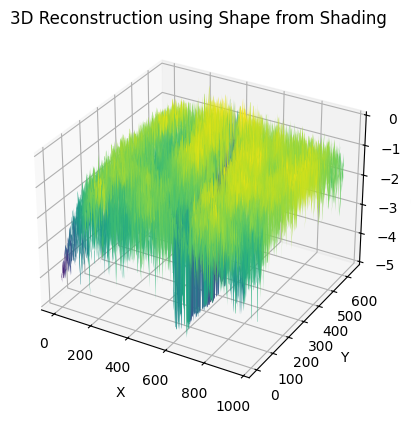

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import imageio  # Use imageio to read images

# Helper function to compute the surface normals
def compute_normals(I):
    Ix, Iy = np.gradient(I)
    Iz = -1 * np.ones_like(I)  # Assumption: Z-component for light source
    
    # Surface normals
    N = np.dstack((Ix, Iy, Iz))
    N_norm = np.linalg.norm(N, axis=2)
    N = N / N_norm[..., np.newaxis]
    
    return N

# Shape from Shading - Horn's Method for 3D Reconstruction
def shape_from_shading(I, light_dir, num_iterations=100, alpha=0.001):
    # Normalize image intensities
    I = I.astype(np.float32) / 255.0

    # Initialize depth map (Z) with zeros
    Z = np.zeros_like(I)

    # Get image shape
    rows, cols = I.shape
    
    # Compute the surface normals
    N = compute_normals(I)

    # Iteratively update the depth map (Z)
    for _ in range(num_iterations):
        # Compute gradient of the depth map
        Zx, Zy = np.gradient(Z)
        
        # Update the depth based on the difference between image intensity and shading model
        shading = (light_dir[0] * Zx + light_dir[1] * Zy + light_dir[2]) / (np.linalg.norm(light_dir))
        delta_Z = alpha * (I - shading)
        
        Z += delta_Z
    
    return Z

# Plotting 3D Surface
def plot_surface(Z):
    rows, cols = Z.shape
    X, Y = np.meshgrid(np.arange(cols), np.arange(rows))
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='viridis')
    plt.title("3D Reconstruction using Shape from Shading")
    plt.xlabel("X")
    plt.ylabel("Y")
    ax.set_zlabel("Depth")
    plt.show()

# Main Function
if __name__ == "__main__":
    # Load grayscale image using imageio
    image = imageio.imread('cracking.jpg', mode='L')  # Load the image in grayscale

    # Define the light source direction (Assumed known)
    light_direction = np.array([0, 0, 1])  # Example: light directly overhead
    
    # Shape from Shading reconstruction
    depth_map = shape_from_shading(image, light_direction, num_iterations=500, alpha=0.01)
    
    # Plot the 3D reconstruction
    plot_surface(depth_map)


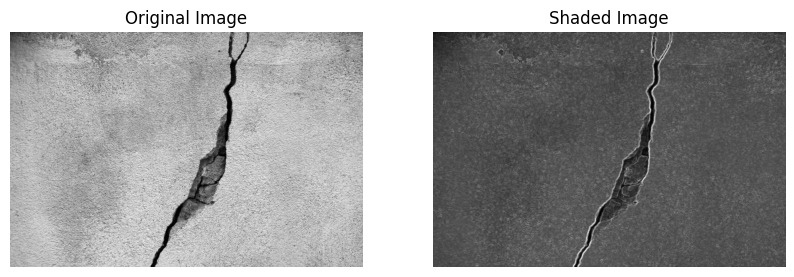

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the crack image
image = cv2.imread('cracking.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian Blur
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

# Calculate gradients using Sobel operator
gradient_x = cv2.Sobel(blurred_image, cv2.CV_64F, 1, 0, ksize=5)
gradient_y = cv2.Sobel(blurred_image, cv2.CV_64F, 0, 1, ksize=5)

# Calculate the magnitude and direction of the gradient
magnitude = np.sqrt(gradient_x**2 + gradient_y**2)
angle = np.arctan2(gradient_y, gradient_x)

# Normalize the magnitude for shading
magnitude_normalized = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)

# Create a shaded image by combining the original image with gradient information
shaded_image = cv2.addWeighted(blurred_image, 0.3, magnitude_normalized.astype(np.uint8), 0.7, 0)

# Display the original and shaded images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(shaded_image, cmap='gray')
plt.title('Shaded Image')
plt.axis('off')

plt.show()


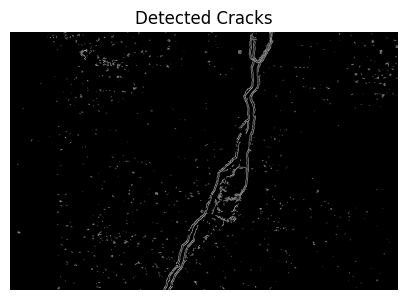

In [16]:
# Step 2: Detect cracks from the shaded image
# Apply Canny edge detection
edges = cv2.Canny(shaded_image, threshold1=180, threshold2=200)

# Display the edges
plt.figure(figsize=(5, 5))
plt.imshow(edges, cmap='gray')
plt.title('Detected Cracks')
plt.axis('off')
plt.show()
